In [143]:
import random
import numpy as np


# 주어진 player의 수, strategy의 영역, strategy의 개수에 의해 
# 전체 pure strategy와 mixed strategy를 생성한다.

def make_strategy(number_of_player=10,strategy_range=[-20,20],number_of_strategy=20,resolution=1):
    """
    [[[pure,mixed]... ~ number_of_strategy]... ~ number_of_player ]
    .shape = (number_of_player,number_of_strategy,2 (pure,mixed))
    """
    def non_duplicate_randrange(l,h,r,c):
        lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        while (not len(lst[:,0]) == len(set(lst[:,0]))):
            lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        return lst    
    
    S = [non_duplicate_randrange(strategy_range[0],strategy_range[1],resolution,number_of_strategy) for x in range(number_of_player)]
    return np.asarray(S, dtype=np.float64)


#S에서 player들에 대한 전략을 선택 한다.
#선택은 mixed strategy의 확율에 의해..
def choice_strategies(strategy_matrix):
    return np.asarray([random.choices(population=strategy_matrix[i,:,0],weights=strategy_matrix[i,:,1],k=1) for i in range(strategy_matrix.shape[0])]).reshape(strategy_matrix.shape[0])



In [144]:
#Step1-1
#모든 player의 pure strategy와, mixed strategy의 생성 & 확인
# S에 해당.
strategy_matrix = make_strategy(10,[-20,20],20,1)
strategy_matrix

array([[[-14.  ,   0.05],
        [ 13.  ,   0.05],
        [ 18.  ,   0.05],
        [  8.  ,   0.05],
        [-17.  ,   0.05],
        [-19.  ,   0.05],
        [ -1.  ,   0.05],
        [  4.  ,   0.05],
        [  5.  ,   0.05],
        [-11.  ,   0.05],
        [ 15.  ,   0.05],
        [-10.  ,   0.05],
        [-16.  ,   0.05],
        [ -4.  ,   0.05],
        [  1.  ,   0.05],
        [ 19.  ,   0.05],
        [-18.  ,   0.05],
        [ -2.  ,   0.05],
        [  9.  ,   0.05],
        [ -9.  ,   0.05]],

       [[  6.  ,   0.05],
        [  0.  ,   0.05],
        [-11.  ,   0.05],
        [  7.  ,   0.05],
        [ 12.  ,   0.05],
        [ 10.  ,   0.05],
        [ -9.  ,   0.05],
        [ -8.  ,   0.05],
        [ -2.  ,   0.05],
        [  2.  ,   0.05],
        [  1.  ,   0.05],
        [ 14.  ,   0.05],
        [  9.  ,   0.05],
        [-14.  ,   0.05],
        [  8.  ,   0.05],
        [-10.  ,   0.05],
        [ 13.  ,   0.05],
        [ -3.  ,   0.05],
        [ 

In [145]:
#Step1-2
#최초 t=1에 해당하는 player의 strategy 선택 & 확인 
t1 = choice_strategies(strategy_matrix)
t1

array([  1.,  19.,   1., -16.,  14.,   8.,  14., -10., -12., -16.])

In [146]:
#Step2-1
# player 0의 pure strategy에 대한 (si,Y-i(t)) 생성, 표본 개수 10개
def make_Y_sample(strategy_matrix,player=0,p_strategy=0,sample_count = 10):
    Y_sample = np.asarray([choice_strategies(strategy_matrix) for i in range(sample_count)])
    Y_sample[:,player] = strategy_matrix[player,p_strategy,0]
    return Y_sample


sample_count = 10
#(s0,Y-0(t))
Y0 = np.asarray([make_Y_sample(strategy_matrix,player=0,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])])
print("Shape of Y-0",Y0.shape)
Y0

Shape of Y-0 (20, 10, 10)


array([[[-14.,   2.,  -2., ..., -18.,   2.,  12.],
        [-14.,  -9., -15., ..., -18., -12.,  19.],
        [-14.,  10.,  -8., ...,   7.,  19.,  11.],
        ...,
        [-14.,  -8.,  -6., ...,  12.,  -4.,  17.],
        [-14.,   6.,  19., ..., -17.,   5.,   9.],
        [-14.,  -2.,  -9., ...,   9.,   3.,   3.]],

       [[ 13.,   6.,   8., ...,   7., -12.,  17.],
        [ 13.,  10.,  -6., ...,  14.,  -4., -10.],
        [ 13.,   0.,   7., ...,   7.,  14.,  12.],
        ...,
        [ 13.,   1.,  -8., ..., -19.,  19., -18.],
        [ 13.,  -3.,  -2., ...,   9., -12.,  15.],
        [ 13.,  19.,   1., ...,  -5., -19.,  -4.]],

       [[ 18.,   6.,  15., ..., -17., -13.,   9.],
        [ 18.,  -9.,   2., ...,  11.,   2.,   3.],
        [ 18., -14.,  18., ...,  15.,  19., -10.],
        ...,
        [ 18.,  -3.,  -6., ...,   4.,   3.,  -1.],
        [ 18.,   9.,   4., ...,  -5.,   5.,  -1.],
        [ 18.,  -3.,  -1., ...,  -7.,   4.,  15.]],

       ...,

       [[ -2.,   1.,   1

In [147]:
#Step2-2
#모든 player에 대한 (si,Y-i(t))의 생성

si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
# player_count,pure_strategy_count,sample_count,strategy_count
print("Shape of si_Y_i",si_Y_i.shape)
si_Y_i


Shape of si_Y_i (10, 20, 10, 10)


array([[[[-14.,   1.,  -2., ..., -10., -12.,  -1.],
         [-14.,  14., -12., ...,  12.,  15.,   6.],
         [-14., -17.,  15., ...,  14.,  10.,  -4.],
         ...,
         [-14.,   9.,  -6., ...,   0.,  14.,  -2.],
         [-14.,  12., -15., ...,  12.,  -4., -19.],
         [-14., -17.,   1., ..., -11., -20.,   1.]],

        [[ 13.,   9.,   2., ..., -19.,  -8.,   6.],
         [ 13.,  19.,  16., ..., -17.,   8., -12.],
         [ 13., -17.,  18., ..., -18.,  16.,  19.],
         ...,
         [ 13.,  14.,  19., ...,   7.,  16.,  15.],
         [ 13., -10.,   0., ...,  14.,   0.,  -5.],
         [ 13.,   8.,  12., ...,   9.,   8.,   1.]],

        [[ 18., -14.,  -9., ..., -18.,  10.,   7.],
         [ 18.,  -3.,  16., ..., -11.,   4., -19.],
         [ 18.,   9.,   0., ..., -19.,  -1.,  -5.],
         ...,
         [ 18.,  10.,   8., ..., -11., -20.,  19.],
         [ 18.,  10.,  -2., ..., -10.,   3.,  17.],
         [ 18., -11.,   1., ...,  11.,   2.,   3.]],

        ...,

  

In [148]:
#Step2-3
# 목적함수(Test Function)의 정의
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

#Step2-4
# (si,Y-i(t))에서 playe 0의 각 pure_strategy에 대한 sample의 f1 평균값 계산 
def _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:]):
    y_m = np.asarray([np.mean([test_function(sample_strategies[j,i,:]) for i in range(sample_strategies.shape[1])]) for j in range(sample_strategies.shape[0])])
    return y_m

y_m = _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:])
y_m

array([ -7.97596726,   4.76321293,  -0.15968094,  -1.62998272,
       -23.0526136 , -26.469336  ,  -4.743657  , -21.03568296,
       -17.21042633,  -5.61013516,  21.72930592,   5.14652386,
       -25.48544242,  -1.79964774, -12.74194461,  15.74322969,
       -20.67722232,  -6.55057413,  -4.41762469,  -3.5864146 ])

In [149]:
# t+1에서 player 0의 best response 취득 
# 

br_0 =  strategy_matrix[0,y_m.argmin(),0]
br_0

-19.0

In [150]:
#Step2-5
# t+1에서 모든 player에 대한 best response 취득

br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
br

array([-19., -17.,   8.,   5., -20., -19., -20., -20., -20., -19.])

In [151]:
#Step3-1
# player 0의 t+1에 대한 mixed strategy의 갱신
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
print(strategy_matrix[0,:,1])
t=1
strategy_matrix[0,:,1] = strategy_matrix[0,:,1]+(1/(t+1))*(((strategy_matrix[0,:,0]==br[0]) * 1) - strategy_matrix[0,:,1])
strategy_matrix[0,:,:]

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


array([[-14.   ,   0.025],
       [ 13.   ,   0.025],
       [ 18.   ,   0.025],
       [  8.   ,   0.025],
       [-17.   ,   0.025],
       [-19.   ,   0.525],
       [ -1.   ,   0.025],
       [  4.   ,   0.025],
       [  5.   ,   0.025],
       [-11.   ,   0.025],
       [ 15.   ,   0.025],
       [-10.   ,   0.025],
       [-16.   ,   0.025],
       [ -4.   ,   0.025],
       [  1.   ,   0.025],
       [ 19.   ,   0.025],
       [-18.   ,   0.025],
       [ -2.   ,   0.025],
       [  9.   ,   0.025],
       [ -9.   ,   0.025]])

In [152]:
#Step3-2
#모든 player의 t+1에 대한 mixed strategy의 갱신
t=1
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
for i in range(strategy_matrix.shape[0]):
    strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])

strategy_matrix

array([[[-14.   ,   0.025],
        [ 13.   ,   0.025],
        [ 18.   ,   0.025],
        [  8.   ,   0.025],
        [-17.   ,   0.025],
        [-19.   ,   0.525],
        [ -1.   ,   0.025],
        [  4.   ,   0.025],
        [  5.   ,   0.025],
        [-11.   ,   0.025],
        [ 15.   ,   0.025],
        [-10.   ,   0.025],
        [-16.   ,   0.025],
        [ -4.   ,   0.025],
        [  1.   ,   0.025],
        [ 19.   ,   0.025],
        [-18.   ,   0.025],
        [ -2.   ,   0.025],
        [  9.   ,   0.025],
        [ -9.   ,   0.025]],

       [[  6.   ,   0.025],
        [  0.   ,   0.025],
        [-11.   ,   0.025],
        [  7.   ,   0.025],
        [ 12.   ,   0.025],
        [ 10.   ,   0.025],
        [ -9.   ,   0.025],
        [ -8.   ,   0.025],
        [ -2.   ,   0.025],
        [  2.   ,   0.025],
        [  1.   ,   0.025],
        [ 14.   ,   0.025],
        [  9.   ,   0.025],
        [-14.   ,   0.025],
        [  8.   ,   0.025],
        [-10.   , 

In [153]:
#Step3-3
#mixed strategy의 갱신 후, 각 player의 strategy 취득
t2 = choice_strategies(strategy_matrix)
t2

array([  5.,  -8., -15.,   5., -20., -19.,   6., -20., -20.,   1.])

In [154]:
#Step3-4
#이때의 f1의 값
f1(t2)

-96.19381668369323

In [155]:
#Step4
#t<-t+1로 두고 Step2와 Step3의 t=N회 반복  : 전체 최적화 알고리즘

def continuos_optimization_based_on_play_theory(object_function=f1,
                                                player_count=10,
                                                strategy_range=[-20,20],
                                                number_of_strategies = 20,
                                                sample_count = 10,
                                                epoch = 100,
                                                resolution=1):
    strategy_matrix = make_strategy(player_count,strategy_range,number_of_strategies,resolution)
    history = []
    for t in range(1,epoch+1):
        #Sample strategy 추출
        si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
        #시행에 대한 best response 추출
        br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=object_function,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
        #mixed strategy의 갱신
        for i in range(strategy_matrix.shape[0]):
            strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])
        #다음 strategy 추출
        s = choice_strategies(strategy_matrix)
        # 목적함수의 값 산출
        mv = object_function(s)
        print("\r{}/{} object_function({})={}               ".format(t,epoch,s,mv), end="", flush=True)
        history.append(mv)
    return s,history    

100/100 object_function([-19. -18. -20. -14. -19. -20. -18. -20. -16. -20.])=-165.46783778384562               

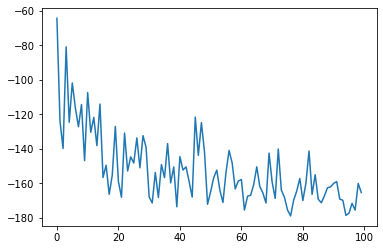

In [156]:
# 실험1
import matplotlib.pyplot as plt
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

player_count = 10
strategy_range=[-20,20]
number_of_strategies = 20
sample_count = 10
epoch = 100
resolution = 1

s,history = continuos_optimization_based_on_play_theory(object_function=f1,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()

100/100 object_function([-1.  2.  1.  1.  0.  1.  0.  2.  1. -3.])=22.0                          

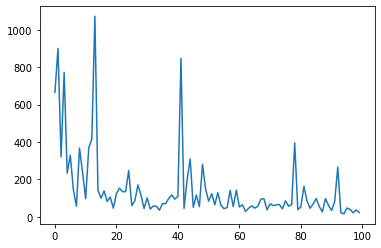

In [157]:
# 실험2
# 논문에서 f2에 해당하는 함수
def f2(player_strategies):
    y = np.sum(player_strategies*player_strategies - 10 * np.cos(2*np.pi*player_strategies)+10)
    return y

s,history = continuos_optimization_based_on_play_theory(object_function=f2,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()


100/100 object_function([ -9.  -4.  -9.   5.  14.   0.   9. -15.   7.  -9.])=121.0               

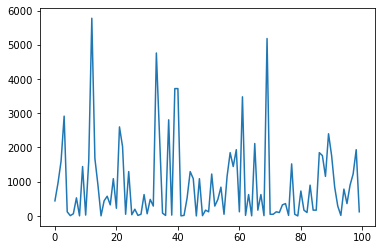

In [158]:
# 실험3
# 논문에서 f3에 해당하는 함수
def f3(player_strategies):
    y = np.sum(np.sum(player_strategies)**2)
    return y

s,history = continuos_optimization_based_on_play_theory(object_function=f3,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()